In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os
import json
import pandas as pd
import sys
sys.path.append("D:\\Research_CAE\\MyTinyCUDANN\\tiny-cuda-nn\\main")
from tools import get_lambda_curve,get_loss_curve,get_result_table
main_path = os.path.dirname(os.path.abspath("__file__"))
print(main_path)
figure_path = os.path.join(main_path, "figs")
fontsize = 18
plt.rcParams['font.size'] = fontsize
plt.rcParams['figure.dpi'] = 100
plt.rcParams['lines.linewidth'] = 2

result_dict = {}

d:\Research_CAE\MyTinyCUDANN\tiny-cuda-nn\main\Helmholtz_equation


Lambda vs finial error

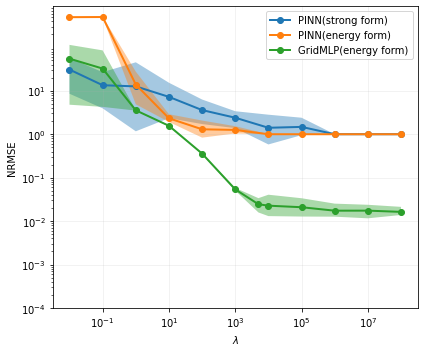

In [5]:
loss_name_list = [
    "PINN_lambda_ADAM",
    "PINN_energy_lambda_ADAM",
    "GridMLP_standard",
]
label_list = [
    "PINN(strong form)",
    "PINN(energy form)",
    "GridMLP(energy form)",
]

for loss_name in loss_name_list:
    loss_dict = get_lambda_curve(loss_name, main_path)
    result_dict[loss_name] = loss_dict

fig = plt.figure(figsize=(6,5))
i = 0
for loss_name in loss_name_list:
    plt.plot(result_dict[loss_name]["x"],result_dict[loss_name]["y"] ,marker="o",label=label_list[i])
    plt.fill_between(result_dict[loss_name]["x"], result_dict[loss_name]["y1"], result_dict[loss_name]["y2"], alpha=0.4)
    i += 1
plt.xlabel(r"$\lambda$")
plt.ylabel("NRMSE")
plt.yscale("log")
plt.yticks([1e-4,1e-3,1e-2,1e-1,1e0,1e1])
plt.xscale("log")
plt.grid(alpha = 0.2)
plt.legend()
fig.tight_layout()
# plt.savefig(os.path.join(figure_path,"lambda_error.png"), dpi=300)
plt.show()

Loss curve 

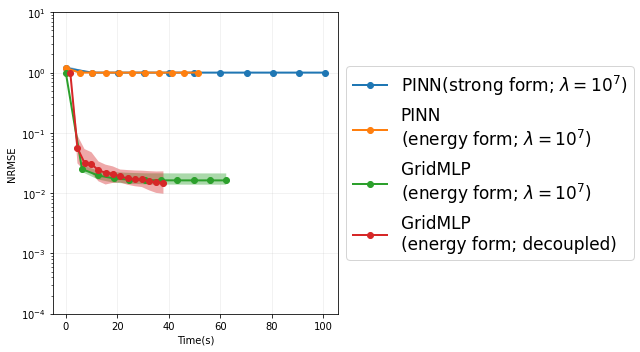

In [12]:
loss_name_list = [
"PINN_lambda_ADAM/config_10",
"PINN_energy_lambda_ADAM/config_10",
"GridMLP_standard/config_11",
"GridMLP_decoupled/config_3",
]

label_list = [

"PINN(strong form; $\lambda = 10^{7}$)",
# "GridMLP(energy form; $\lambda = 10^{2}$)",
# "GridMLP(energy form;share parameters)",
"PINN\n(energy form; $\lambda = 10^{7}$)",
"GridMLP\n(energy form; $\lambda = 10^{7}$)",
"GridMLP\n(energy form; decoupled)",
]

for loss_name in loss_name_list:
    task_name,dir_name = loss_name.split("/")
    loss_dict = get_loss_curve(task_name,dir_name, main_path)
    result_dict[loss_name] = loss_dict

fig = plt.figure(figsize=(9,5))
i = 0
for loss_name in loss_name_list:
    plt.plot(result_dict[loss_name]["x"],result_dict[loss_name]["y"] ,marker="o",label=label_list[i])
    plt.fill_between(result_dict[loss_name]["x"], result_dict[loss_name]["y1"], result_dict[loss_name]["y2"], alpha=0.4)
    i += 1
plt.xlabel("Time(s)")
plt.ylabel("NRMSE")
plt.yscale("log")
plt.yticks([1e-4,1e-3,1e-2,1e-1,1e0,1e1])
# plt.xscale("log")
plt.grid(alpha = 0.2)
# plt.legend(fontsize=14)
# plt.legend(loc='upper center',bbox_to_anchor=(0.5, -0.15), ncol=1)
plt.legend(loc='center left',fontsize=17, bbox_to_anchor=(1., 0.5))
fig.tight_layout()
# plt.savefig(os.path.join(figure_path,"training_loss.png"), dpi=300)
plt.show()

Final loss value

In [51]:
for loss_name in loss_name_list:
    loss = result_dict[loss_name]
    print(loss['x'][-1],loss['y'][-1])

83.88504571914673 0.15659371876060316
113.11235432624817 0.004873744765460238
51.501800298690796 0.0005959899325806244


Hyper-parameters

In [102]:
result_dict = get_result_table("GridMLP_share_network",[["network","n_neurons"],["network","n_hidden_layers"]])
result_df = pd.DataFrame(result_dict).T
result_df

,n_neurons,n_hidden_layers,error,time,error_min,error_max
config_0,16.0,0.0,0.000750,39.986892,0.000474,0.001054
config_1,16.0,1.0,0.000645,51.026098,0.000427,0.001034
config_10,64.0,2.0,0.000808,59.678682,0.000537,0.001247
config_11,64.0,3.0,0.000718,70.230249,0.000446,0.001010
config_12,128.0,0.0,0.000728,40.791700,0.000460,0.001255
config_13,128.0,1.0,0.000766,50.276801,0.000473,0.001015
config_14,128.0,2.0,0.000983,60.138536,0.000524,0.001637
config_15,128.0,3.0,0.001338,68.029374,0.000490,0.002718
config_2,16.0,2.0,0.000760,59.006803,0.000474,0.001038
config_3,16.0,3.0,0.000645,68.956895,0.000381,0.001070


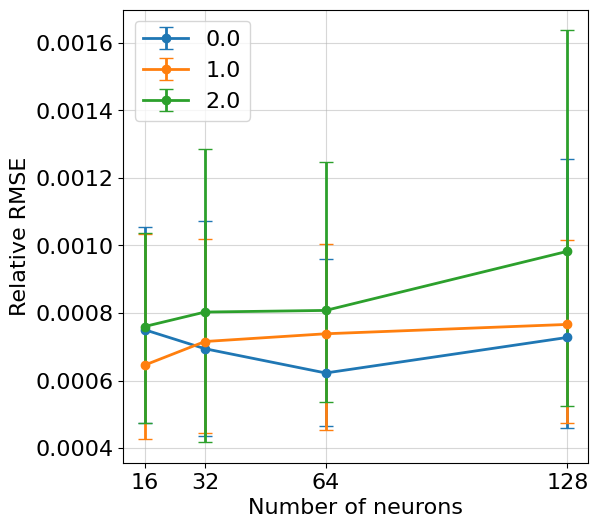

In [103]:
# n_hidden_layers_list = result_df["n_hidden_layers"].unique()
n_hidden_layers_list = [0.0,1.0,2.0]
i=0
plt.figure(figsize=(6,6))
for n_hidden_layers in n_hidden_layers_list:
    sub_df = result_df[result_df["n_hidden_layers"] == n_hidden_layers]
    sort_idx = np.argsort(sub_df["n_neurons"])
    x_plot = sub_df["n_neurons"][sort_idx]
    y_plot = sub_df["error"][sort_idx]
    y1_plot = sub_df["error_min"][sort_idx]
    y2_plot = sub_df["error_max"][sort_idx]
    y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
    plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label=n_hidden_layers)
    plt.legend()
    plt.xticks(result_df["n_neurons"].unique())
    plt.ylabel("Relative RMSE")
    plt.xlabel("Number of neurons")

    plt.grid(alpha = 0.5)

In [26]:
all_df = pd.DataFrame()
task_list = [
    "GridMLP_share_network_sin_spectral",
]
param_list = [
    ["network","n_neurons"],
    ["network","n_hidden_layers"],
    ["network","spectral_norm"],
]
for task_name in task_list:
    result_dict = get_result_table(task_name,param_list)
    result_df = pd.DataFrame(result_dict).T
    all_df = pd.concat([all_df,result_df])
# all_df

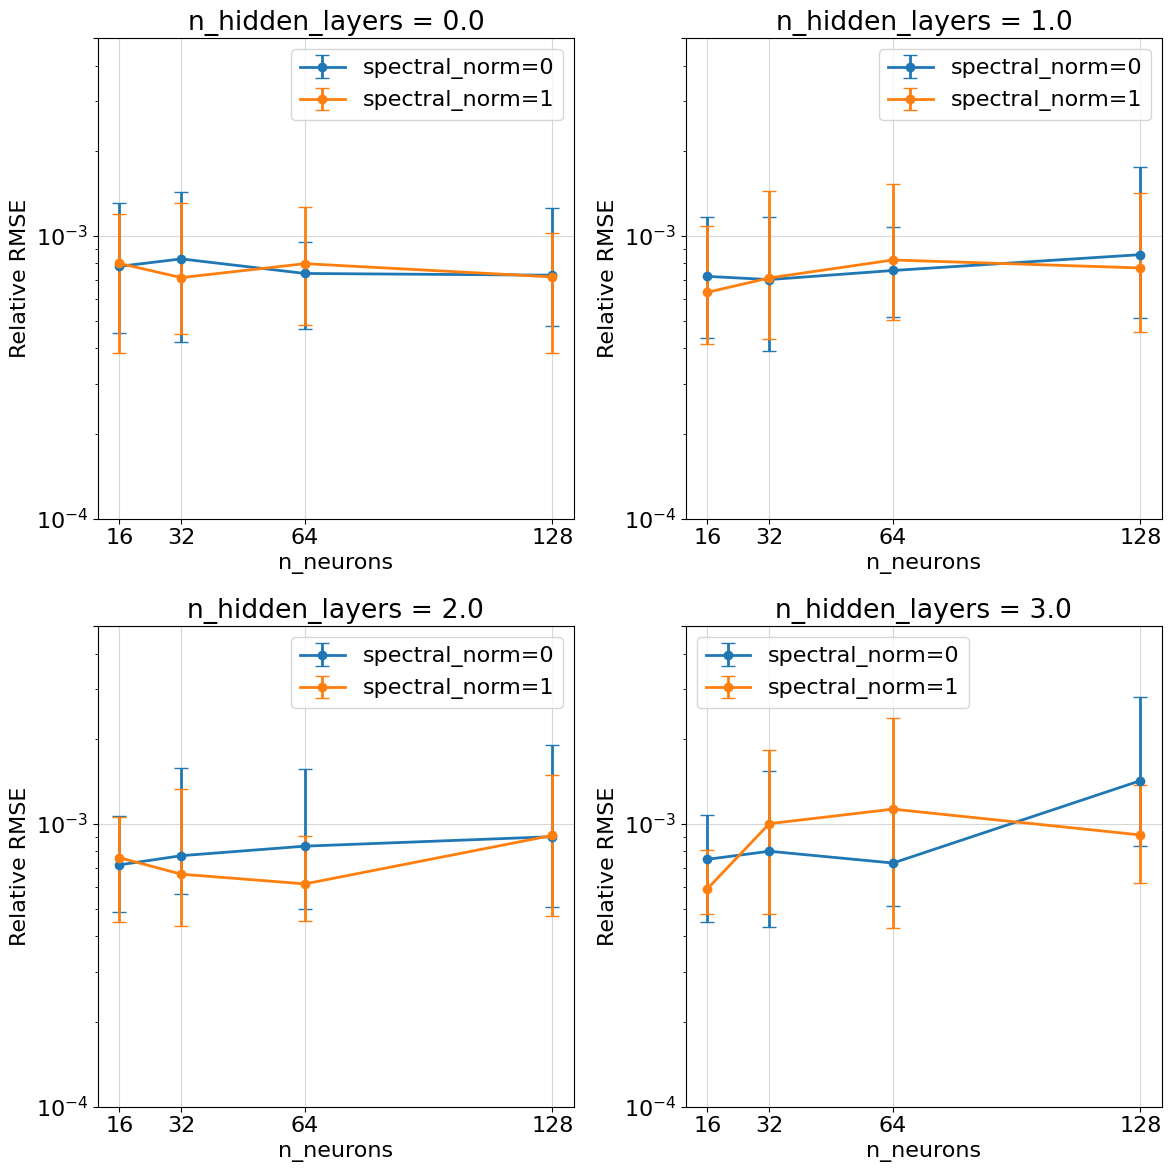

In [29]:
spectral_norm_list = np.sort(all_df["spectral_norm"].unique())
result_df = all_df
i=0
plt.figure(figsize=(12,12))
for n_hidden_layers in np.sort(all_df["n_hidden_layers"].unique()):
    i = i + 1
    result_df_n_hidden_layers = result_df[result_df["n_hidden_layers"] == n_hidden_layers]
    plt.subplot(2,2,i)
    for spectral_norm in spectral_norm_list:
        sub_df = result_df_n_hidden_layers[result_df_n_hidden_layers["spectral_norm"] == spectral_norm]
        sort_idx = np.argsort(sub_df["n_neurons"])
        n_neurons = sub_df["n_neurons"][sort_idx]
        x_plot = n_neurons
        y_plot = sub_df["error"][sort_idx]
        y1_plot = sub_df["error_min"][sort_idx]
        y2_plot = sub_df["error_max"][sort_idx]
        y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
        plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label="spectral_norm={}".format(int(spectral_norm)))
        plt.legend()
        # plt.xticks(xticks,(xticks*1.12**(4-2)).astype(int))
        plt.yscale("log")
        plt.yticks([5e-3,1e-3,1e-4])
        # plt.ylim([3e-4,3e-3])
        plt.ylabel("Relative RMSE")
        plt.xlabel("n_neurons")
        plt.xticks(np.sort(all_df["n_neurons"].unique()))
        plt.grid(alpha = 0.5)
        # plt.title("Simple MLP (0 hidden layer, 16 neurons)")
        plt.title("n_hidden_layers = {}".format(n_hidden_layers))
        plt.tight_layout()
plt.tight_layout()
# plt.savefig(os.path.join(figure_path,"GridMLP_decoupled_resolution_levels_batch.png"), dpi=300)

n levels vs error by keeping max resolution the same (78*78)

In [88]:
result_dict = get_result_table("GridMLP_share_levels_network",[["network","n_neurons"],["network","n_hidden_layers"],["encoding","n_levels"]])
result_df = pd.DataFrame(result_dict).T
result_df

,n_neurons,n_hidden_layers,n_levels,error,time,error_min,error_max
config_0,16.0,0.0,4.0,0.000721,41.521600,0.000392,0.001076
config_1,32.0,2.0,4.0,0.000857,60.869100,0.000535,0.001486
config_2,16.0,0.0,8.0,0.000647,41.158869,0.000436,0.000943
config_3,32.0,2.0,8.0,0.000858,61.069389,0.000453,0.001421
config_4,16.0,0.0,12.0,0.000671,40.651000,0.000389,0.000941
config_5,32.0,2.0,12.0,0.000722,61.191682,0.000470,0.001729
config_6,16.0,0.0,16.0,0.000800,39.487211,0.000387,0.001507
config_7,32.0,2.0,16.0,0.000758,60.857379,0.000406,0.001468
config_8,16.0,0.0,20.0,0.000609,40.279100,0.000470,0.000921
config_9,32.0,2.0,20.0,0.000575,60.767412,0.000413,0.000871


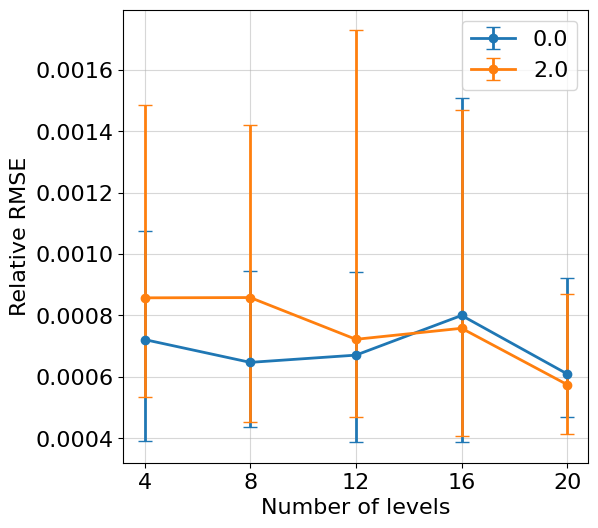

In [89]:
n_hidden_layers_list = result_df["n_hidden_layers"].unique()
i=0
plt.figure(figsize=(6,6))
for n_hidden_layers in n_hidden_layers_list:
    sub_df = result_df[result_df["n_hidden_layers"] == n_hidden_layers]
    sort_idx = np.argsort(sub_df["n_levels"])
    x_plot = sub_df["n_levels"][sort_idx]
    y_plot = sub_df["error"][sort_idx]
    y1_plot = sub_df["error_min"][sort_idx]
    y2_plot = sub_df["error_max"][sort_idx]
    y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
    plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label=n_hidden_layers)
    plt.legend()
    plt.xticks(result_df["n_levels"].unique())
    plt.ylabel("Relative RMSE")
    plt.xlabel("Number of levels")

    plt.grid(alpha = 0.5)

In [6]:
result_dict = get_result_table("GridMLP_share_resolution_network",[["network","n_neurons"],["network","n_hidden_layers"],["encoding","base_resolution"]])
result_df = pd.DataFrame(result_dict).T
result_df

,n_neurons,n_hidden_layers,base_resolution,error,time,error_min,error_max
d:\Research_CAE\MyTinyCUDANN\tiny-cuda-nn\main\microscale_pbc\Tasks\GridMLP_share_resolution_network\config_0,16.0,0.0,16.0,0.004221,36.259808,0.003782,0.004571
d:\Research_CAE\MyTinyCUDANN\tiny-cuda-nn\main\microscale_pbc\Tasks\GridMLP_share_resolution_network\config_1,32.0,2.0,16.0,0.004203,54.538237,0.003798,0.004875
d:\Research_CAE\MyTinyCUDANN\tiny-cuda-nn\main\microscale_pbc\Tasks\GridMLP_share_resolution_network\config_2,16.0,0.0,32.0,0.000980,37.600018,0.000645,0.001525
d:\Research_CAE\MyTinyCUDANN\tiny-cuda-nn\main\microscale_pbc\Tasks\GridMLP_share_resolution_network\config_3,32.0,2.0,32.0,0.000913,55.146721,0.000625,0.001252
d:\Research_CAE\MyTinyCUDANN\tiny-cuda-nn\main\microscale_pbc\Tasks\GridMLP_share_resolution_network\config_4,16.0,0.0,64.0,0.000659,42.117983,0.000411,0.001190
d:\Research_CAE\MyTinyCUDANN\tiny-cuda-nn\main\microscale_pbc\Tasks\GridMLP_share_resolution_network\config_5,32.0,2.0,64.0,0.000741,62.286194,0.000465,0.001323
d:\Research_CAE\MyTinyCUDANN\tiny-cuda-nn\main\microscale_pbc\Tasks\GridMLP_share_resolution_network\config_6,16.0,0.0,128.0,0.004869,44.956795,0.001043,0.009896
d:\Research_CAE\MyTinyCUDANN\tiny-cuda-nn\main\microscale_pbc\Tasks\GridMLP_share_resolution_network\config_7,32.0,2.0,128.0,0.001469,65.741700,0.001208,0.001740
d:\Research_CAE\MyTinyCUDANN\tiny-cuda-nn\main\microscale_pbc\Tasks\GridMLP_share_resolution_network\config_8,16.0,0.0,256.0,0.794242,52.848385,0.520906,0.995629
d:\Research_CAE\MyTinyCUDANN\tiny-cuda-nn\main\microscale_pbc\Tasks\GridMLP_share_resolution_network\config_9,32.0,2.0,256.0,0.021568,69.770000,0.016827,0.033608


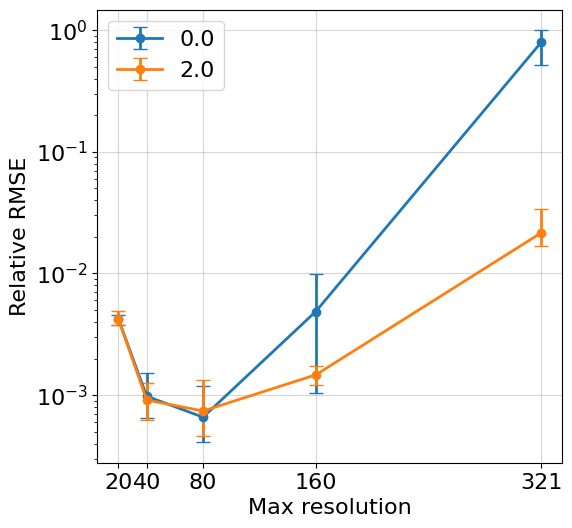

In [4]:
n_hidden_layers_list = result_df["n_hidden_layers"].unique()
xticks = result_df["base_resolution"].unique()
i=0
plt.figure(figsize=(6,6))
for n_hidden_layers in n_hidden_layers_list:
    sub_df = result_df[result_df["n_hidden_layers"] == n_hidden_layers]
    sort_idx = np.argsort(sub_df["base_resolution"])
    x_plot = sub_df["base_resolution"][sort_idx]
    y_plot = sub_df["error"][sort_idx]
    y1_plot = sub_df["error_min"][sort_idx]
    y2_plot = sub_df["error_max"][sort_idx]
    y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
    plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label=n_hidden_layers)
    plt.legend()
    plt.xticks(xticks,(xticks*1.12**(4-2)).astype(int))
    plt.yscale("log")
    plt.ylabel("Relative RMSE")
    plt.xlabel("Max resolution")

    plt.grid(alpha = 0.5)

In [98]:
result_dict = get_result_table("GridMLP_share_resolution_12levels",[["network","n_neurons"],["network","n_hidden_layers"],["encoding","base_resolution"]])
result_df = pd.DataFrame(result_dict).T
result_df

,n_neurons,n_hidden_layers,base_resolution,error,time,error_min,error_max
config_0,16.0,0.0,7.0,0.003005,35.623761,0.002582,0.003550
config_1,32.0,2.0,7.0,0.002844,53.894938,0.001532,0.003798
config_2,16.0,0.0,13.0,0.000978,36.552061,0.000667,0.001580
config_3,32.0,2.0,13.0,0.001118,55.802732,0.000616,0.001855
config_4,16.0,0.0,26.0,0.000715,43.501306,0.000479,0.001452
config_5,32.0,2.0,26.0,0.000816,64.408506,0.000497,0.001089
config_6,16.0,0.0,52.0,0.000770,48.297240,0.000481,0.001200
config_7,32.0,2.0,52.0,0.000677,69.291195,0.000426,0.001048
config_8,16.0,0.0,103.0,0.002281,58.342289,0.000683,0.005533
config_9,32.0,2.0,103.0,0.001531,77.690092,0.000725,0.003435


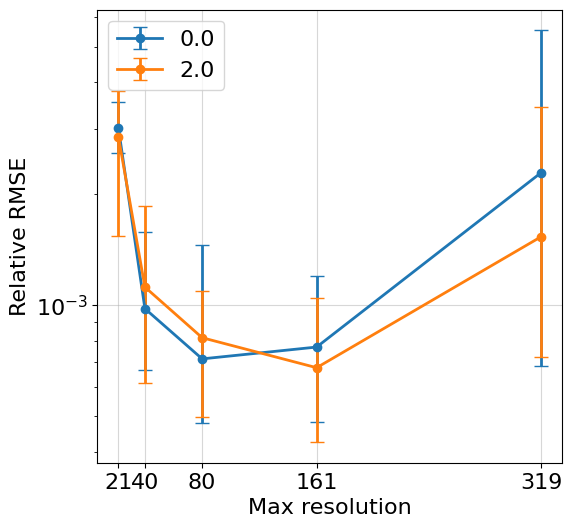

In [100]:
n_hidden_layers_list = result_df["n_hidden_layers"].unique()
xticks = result_df["base_resolution"].unique()
i=0
plt.figure(figsize=(6,6))
for n_hidden_layers in n_hidden_layers_list:
    sub_df = result_df[result_df["n_hidden_layers"] == n_hidden_layers]
    sort_idx = np.argsort(sub_df["base_resolution"])
    x_plot = sub_df["base_resolution"][sort_idx]
    y_plot = sub_df["error"][sort_idx]
    y1_plot = sub_df["error_min"][sort_idx]
    y2_plot = sub_df["error_max"][sort_idx]
    y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
    plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label=n_hidden_layers)
    plt.legend()
    plt.xticks(xticks,(xticks*1.12**(12-2)).astype(int))
    plt.yscale("log")
    plt.ylabel("Relative RMSE")
    plt.xlabel("Max resolution")

    plt.grid(alpha = 0.5)

In [109]:
result_dict = get_result_table("GridMLP_share_resolution_network_1level",[["network","n_neurons"],["network","n_hidden_layers"],["encoding","base_resolution"]])
result_df = pd.DataFrame(result_dict).T
result_df

,n_neurons,n_hidden_layers,base_resolution,error,time,error_min,error_max
config_0,16.0,0.0,20.0,0.008810,37.002601,0.008393,0.009335
config_1,32.0,2.0,20.0,0.008968,52.367899,0.008481,0.009578
config_10,16.0,0.0,160.0,0.017985,42.026799,0.002937,0.047147
config_11,32.0,2.0,160.0,0.004534,60.105922,0.002921,0.007744
config_12,16.0,0.0,200.0,0.074221,42.352000,0.008107,0.199959
config_13,32.0,2.0,200.0,0.008250,61.183786,0.007298,0.009424
config_2,16.0,0.0,40.0,0.002240,37.468315,0.001713,0.002567
config_3,32.0,2.0,40.0,0.002304,54.084790,0.002033,0.002849
config_4,16.0,0.0,60.0,0.001222,37.190406,0.000662,0.002039
config_5,32.0,2.0,60.0,0.000917,52.494422,0.000634,0.001410


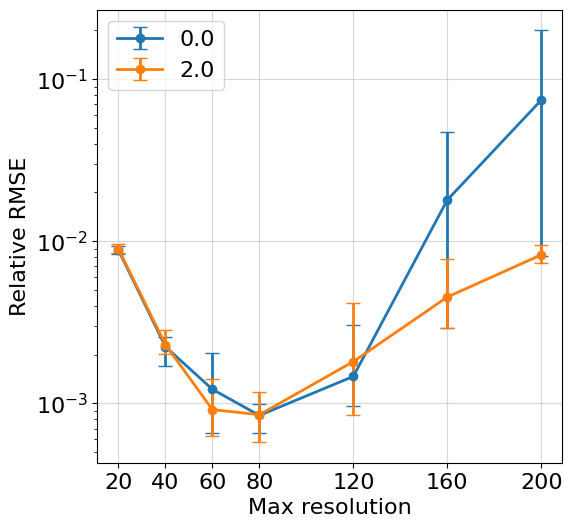

In [110]:
n_hidden_layers_list = result_df["n_hidden_layers"].unique()
xticks = result_df["base_resolution"].unique()
i=0
plt.figure(figsize=(6,6))
for n_hidden_layers in n_hidden_layers_list:
    sub_df = result_df[result_df["n_hidden_layers"] == n_hidden_layers]
    sort_idx = np.argsort(sub_df["base_resolution"])
    x_plot = sub_df["base_resolution"][sort_idx]
    y_plot = sub_df["error"][sort_idx]
    y1_plot = sub_df["error_min"][sort_idx]
    y2_plot = sub_df["error_max"][sort_idx]
    y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
    plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label=n_hidden_layers)
    plt.legend()
    plt.xticks(xticks)
    plt.yscale("log")
    plt.ylabel("Relative RMSE")
    plt.xlabel("Max resolution")

    plt.grid(alpha = 0.5)

In [104]:
result_dict = get_result_table("GridMLP_share_resolution_network_sin",[["network","n_neurons"],["network","n_hidden_layers"],["encoding","base_resolution"]])
result_df = pd.DataFrame(result_dict).T
result_df

,n_neurons,n_hidden_layers,base_resolution,error,time,error_min,error_max
config_0,16.0,0.0,16.0,0.004261,37.025259,0.003769,0.004802
config_1,32.0,2.0,16.0,0.004063,58.018429,0.003723,0.004526
config_2,16.0,0.0,32.0,0.000957,37.766005,0.000643,0.001376
config_3,32.0,2.0,32.0,0.001049,57.346377,0.000742,0.001525
config_4,16.0,0.0,64.0,0.001414,42.376727,0.000542,0.002489
config_5,32.0,2.0,64.0,0.001038,62.327696,0.000498,0.001944
config_6,16.0,0.0,128.0,0.035985,44.728696,0.026412,0.047330
config_7,32.0,2.0,128.0,0.001402,65.516095,0.001060,0.001840
config_8,16.0,0.0,256.0,0.677033,51.542004,0.590114,0.761285
config_9,32.0,2.0,256.0,0.217772,72.129497,0.016699,0.999774


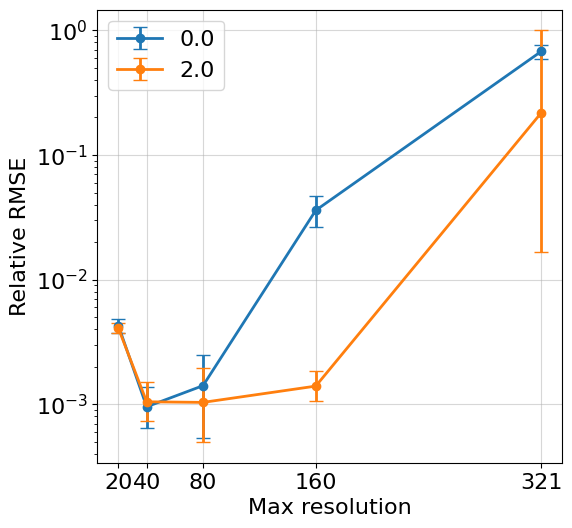

In [107]:
n_hidden_layers_list = result_df["n_hidden_layers"].unique()
xticks = result_df["base_resolution"].unique()
i=0
plt.figure(figsize=(6,6))
for n_hidden_layers in n_hidden_layers_list:
    sub_df = result_df[result_df["n_hidden_layers"] == n_hidden_layers]
    sort_idx = np.argsort(sub_df["base_resolution"])
    x_plot = sub_df["base_resolution"][sort_idx]
    y_plot = sub_df["error"][sort_idx]
    y1_plot = sub_df["error_min"][sort_idx]
    y2_plot = sub_df["error_max"][sort_idx]
    y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
    plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label=n_hidden_layers)
    plt.legend()
    plt.xticks(xticks,(xticks*1.12**(4-2)).astype(int))
    plt.yscale("log")
    plt.ylabel("Relative RMSE")
    plt.xlabel("Max resolution")

    plt.grid(alpha = 0.5)

In [10]:
all_df = pd.DataFrame()
task_list = [
    "GridMLP_share_resolution_network",
    "GridMLP_share_resolution_12levels",
    "GridMLP_share_resolution_network_1level"
]
param_list = [
    ["network","n_neurons"],
    ["network","n_hidden_layers"],
    ["encoding","base_resolution"],
    ["encoding","n_levels"],]
for task_name in task_list:
    result_dict = get_result_table(task_name,param_list)
    result_df = pd.DataFrame(result_dict).T
    all_df = pd.concat([all_df,result_df])
all_df

,n_neurons,n_hidden_layers,base_resolution,n_levels,error,time,error_min,error_max
d:\Research_CAE\MyTinyCUDANN\tiny-cuda-nn\main\microscale_pbc\Tasks\GridMLP_share_resolution_network\config_0,16.0,0.0,16.0,4.0,0.004221,36.259808,0.003782,0.004571
d:\Research_CAE\MyTinyCUDANN\tiny-cuda-nn\main\microscale_pbc\Tasks\GridMLP_share_resolution_network\config_1,32.0,2.0,16.0,4.0,0.004203,54.538237,0.003798,0.004875
d:\Research_CAE\MyTinyCUDANN\tiny-cuda-nn\main\microscale_pbc\Tasks\GridMLP_share_resolution_network\config_2,16.0,0.0,32.0,4.0,0.000980,37.600018,0.000645,0.001525
d:\Research_CAE\MyTinyCUDANN\tiny-cuda-nn\main\microscale_pbc\Tasks\GridMLP_share_resolution_network\config_3,32.0,2.0,32.0,4.0,0.000913,55.146721,0.000625,0.001252
d:\Research_CAE\MyTinyCUDANN\tiny-cuda-nn\main\microscale_pbc\Tasks\GridMLP_share_resolution_network\config_4,16.0,0.0,64.0,4.0,0.000659,42.117983,0.000411,0.001190
d:\Research_CAE\MyTinyCUDANN\tiny-cuda-nn\main\microscale_pbc\Tasks\GridMLP_share_resolution_network\config_5,32.0,2.0,64.0,4.0,0.000741,62.286194,0.000465,0.001323
d:\Research_CAE\MyTinyCUDANN\tiny-cuda-nn\main\microscale_pbc\Tasks\GridMLP_share_resolution_network\config_6,16.0,0.0,128.0,4.0,0.004869,44.956795,0.001043,0.009896
d:\Research_CAE\MyTinyCUDANN\tiny-cuda-nn\main\microscale_pbc\Tasks\GridMLP_share_resolution_network\config_7,32.0,2.0,128.0,4.0,0.001469,65.741700,0.001208,0.001740
d:\Research_CAE\MyTinyCUDANN\tiny-cuda-nn\main\microscale_pbc\Tasks\GridMLP_share_resolution_network\config_8,16.0,0.0,256.0,4.0,0.794242,52.848385,0.520906,0.995629
d:\Research_CAE\MyTinyCUDANN\tiny-cuda-nn\main\microscale_pbc\Tasks\GridMLP_share_resolution_network\config_9,32.0,2.0,256.0,4.0,0.021568,69.770000,0.016827,0.033608


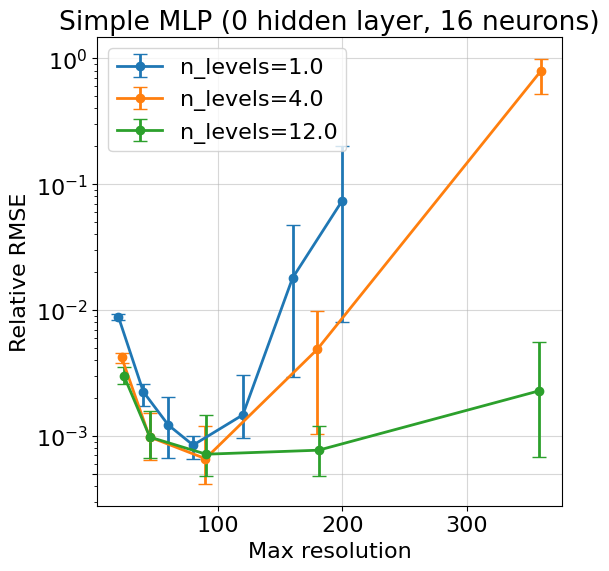

In [30]:
n_level_list = np.sort(all_df["n_levels"].unique())
# xticks = all_df["base_resolution"].unique()
result_df = all_df[all_df["n_hidden_layers"] == 0.0]
i=0
plt.figure(figsize=(6,6))
for n_levels in n_level_list:
    sub_df = result_df[result_df["n_levels"] == n_levels]
    sort_idx = np.argsort(sub_df["base_resolution"])
    base_resolution = sub_df["base_resolution"][sort_idx]
    x_plot = base_resolution*1.12**(n_levels-1)
    y_plot = sub_df["error"][sort_idx]
    y1_plot = sub_df["error_min"][sort_idx]
    y2_plot = sub_df["error_max"][sort_idx]
    y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
    plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label="n_levels={}".format(n_levels))
    plt.legend()
    # plt.xticks(xticks,(xticks*1.12**(4-2)).astype(int))
    plt.yscale("log")
    plt.yticks([1e0,1e-1,1e-2,1e-3,5e-4])
    plt.ylabel("Relative RMSE")
    plt.xlabel("Max resolution")

    plt.grid(alpha = 0.5)
    plt.title("Simple MLP (0 hidden layer, 16 neurons)")
    plt.tight_layout()

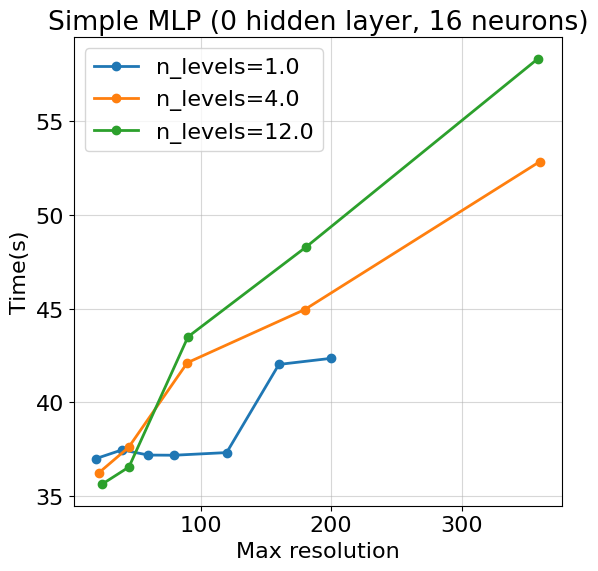

In [26]:
n_level_list = np.sort(all_df["n_levels"].unique())
# xticks = all_df["base_resolution"].unique()
result_df = all_df[all_df["n_hidden_layers"] == 0.0]
i=0
plt.figure(figsize=(6,6))
for n_levels in n_level_list:
    sub_df = result_df[result_df["n_levels"] == n_levels]
    sort_idx = np.argsort(sub_df["base_resolution"])
    base_resolution = sub_df["base_resolution"][sort_idx]
    x_plot = base_resolution*1.12**(n_levels-1)
    y_plot = sub_df["time"][sort_idx]
    # y1_plot = sub_df["error_min"][sort_idx]
    # y2_plot = sub_df["error_max"][sort_idx]
    # y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
    # plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label="n_levels={}".format(n_levels))
    plt.plot(x_plot,y_plot,marker="o",label="n_levels={}".format(n_levels))
    plt.legend()
    # plt.xticks(xticks,(xticks*1.12**(4-2)).astype(int))
    # plt.yscale("log")
    plt.ylabel("Time(s)")
    plt.xlabel("Max resolution")

    plt.grid(alpha = 0.5)
    plt.title("Simple MLP (0 hidden layer, 16 neurons)")
    plt.tight_layout()

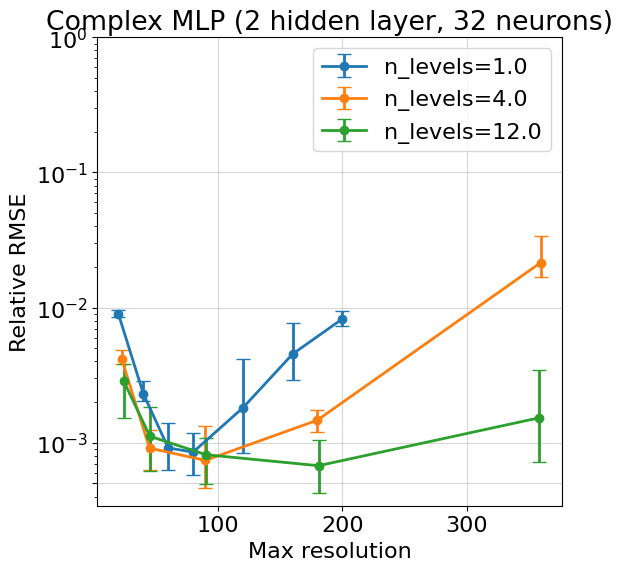

In [31]:
n_level_list = np.sort(all_df["n_levels"].unique())
# xticks = all_df["base_resolution"].unique()
result_df = all_df[all_df["n_hidden_layers"] == 2.0]
i=0
plt.figure(figsize=(6,6))
for n_levels in n_level_list:
    sub_df = result_df[result_df["n_levels"] == n_levels]
    sort_idx = np.argsort(sub_df["base_resolution"])
    base_resolution = sub_df["base_resolution"][sort_idx]
    x_plot = base_resolution*1.12**(n_levels-1)
    y_plot = sub_df["error"][sort_idx]
    y1_plot = sub_df["error_min"][sort_idx]
    y2_plot = sub_df["error_max"][sort_idx]
    y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
    plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label="n_levels={}".format(n_levels))
    plt.legend()
    # plt.xticks(xticks,(xticks*1.12**(4-2)).astype(int))
    plt.yscale("log")
    plt.yticks([1e0,1e-1,1e-2,1e-3,5e-4])
    plt.ylabel("Relative RMSE")
    plt.xlabel("Max resolution")

    plt.grid(alpha = 0.5)
    plt.title("Complex MLP (2 hidden layer, 32 neurons)")
    plt.tight_layout()

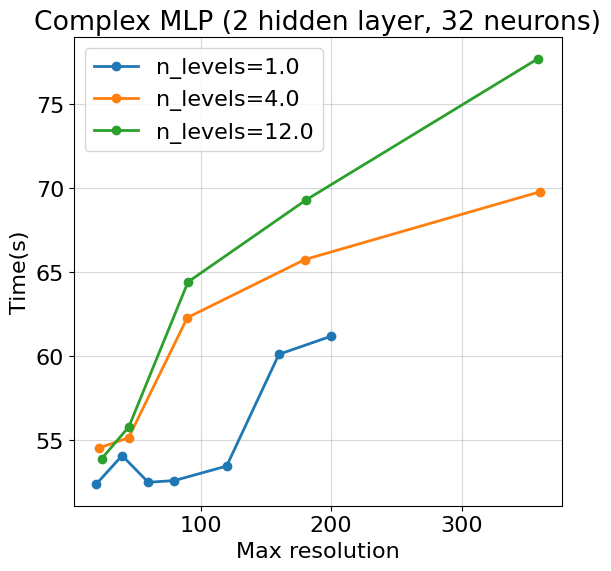

In [24]:
n_level_list = np.sort(all_df["n_levels"].unique())
# xticks = all_df["base_resolution"].unique()
result_df = all_df[all_df["n_hidden_layers"] == 2.0]
i=0
plt.figure(figsize=(6,6))
for n_levels in n_level_list:
    sub_df = result_df[result_df["n_levels"] == n_levels]
    sort_idx = np.argsort(sub_df["base_resolution"])
    base_resolution = sub_df["base_resolution"][sort_idx]
    x_plot = base_resolution*1.12**(n_levels-1)
    y_plot = sub_df["time"][sort_idx]
    # y1_plot = sub_df["error_min"][sort_idx]
    # y2_plot = sub_df["error_max"][sort_idx]
    # y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
    # plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label="n_levels={}".format(n_levels))
    plt.plot(x_plot,y_plot,marker="o",label="n_levels={}".format(n_levels))
    plt.legend()
    # plt.xticks(xticks,(xticks*1.12**(4-2)).astype(int))
    # plt.yscale("log")
    plt.ylabel("Time(s)")
    plt.xlabel("Max resolution")

    plt.grid(alpha = 0.5)
    plt.title("Complex MLP (2 hidden layer, 32 neurons)")
    plt.tight_layout()

In [2]:
all_df = pd.DataFrame()
task_list = [
    "GridMLP_share_resolution_levels_sin_3e3_3e4",
    "GridMLP_share_resolution_levels_sin_3e5",
]
param_list = [
    ["network","n_neurons"],
    ["network","n_hidden_layers"],
    ["encoding","base_resolution"],
    ["encoding","n_levels"],
    ["training","interior_batch"]]
for task_name in task_list:
    result_dict = get_result_table(task_name,param_list,main_path=main_path)
    result_df = pd.DataFrame(result_dict).T
    all_df = pd.concat([all_df,result_df])
# all_df

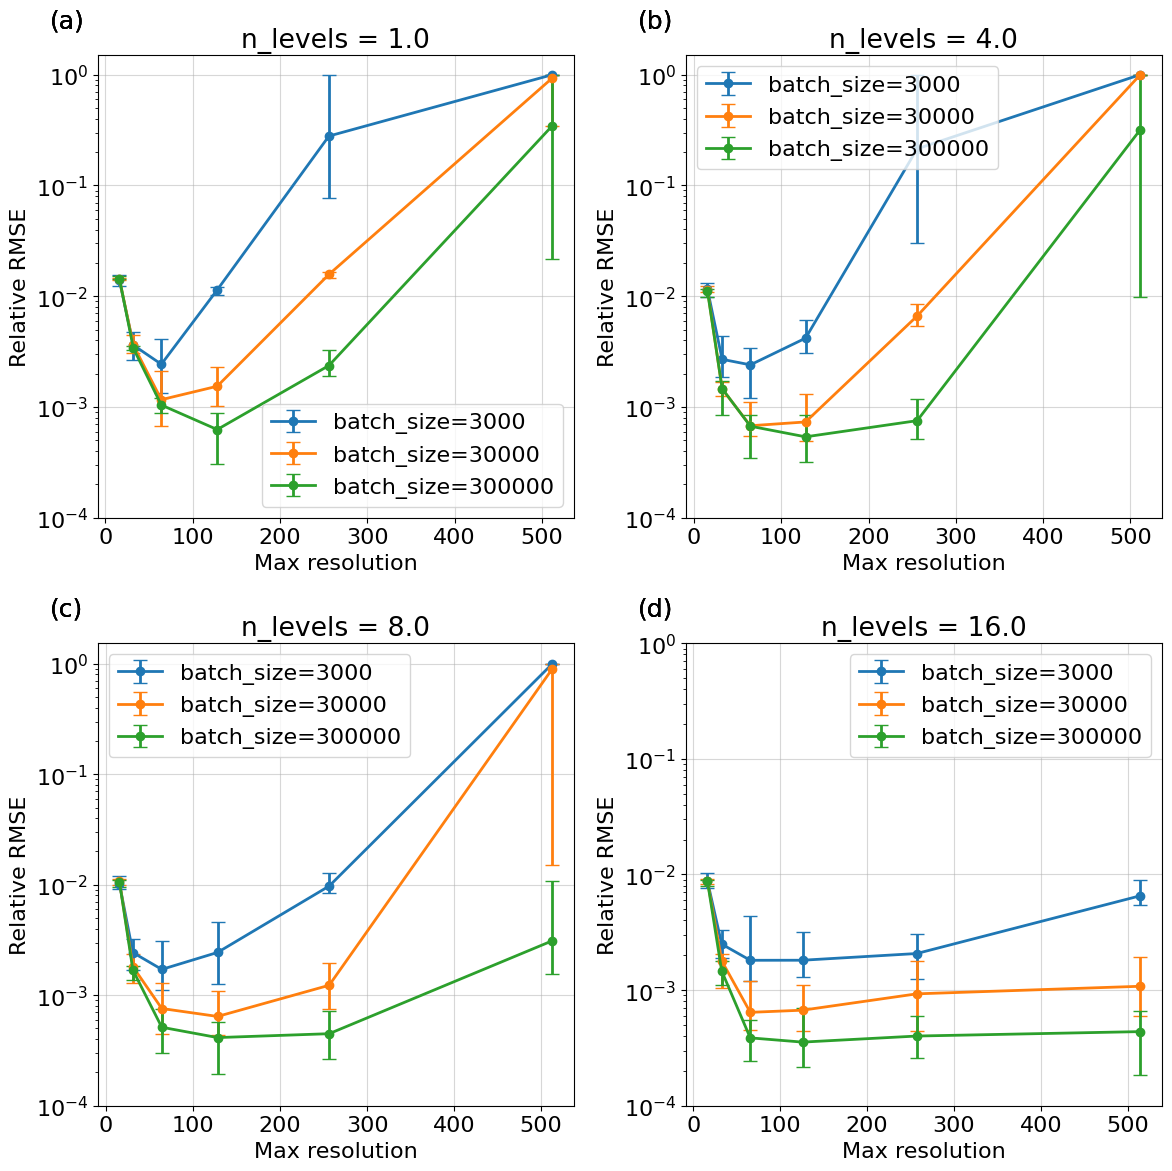

In [42]:
# n_level_list = np.sort(all_df["n_levels"].unique())
batch_size_list = np.sort(all_df["interior_batch"].unique())
# xticks = all_df["base_resolution"].unique()
result_df = all_df[all_df["n_hidden_layers"] == 2.0]


i=0
plt.figure(figsize=(12,12))

for n_levels in np.sort(all_df["n_levels"].unique()):
    i = i + 1
    result_df_n_levels = result_df[result_df["n_levels"] == n_levels]
    plt.subplot(2,2,i)
    for batch_size in batch_size_list:
        sub_df = result_df_n_levels[result_df_n_levels["interior_batch"] == batch_size]
        sort_idx = np.argsort(sub_df["base_resolution"])
        base_resolution = sub_df["base_resolution"][sort_idx]
        x_plot = base_resolution*1.12**(n_levels-1)
        y_plot = sub_df["error"][sort_idx]
        y1_plot = sub_df["error_min"][sort_idx]
        y2_plot = sub_df["error_max"][sort_idx]
        y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
        plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label="batch_size={}".format(int(batch_size)))
        plt.legend()
        # plt.xticks(xticks,(xticks*1.12**(4-2)).astype(int))
        plt.yscale("log")
        plt.yticks([1e0,1e-1,1e-2,1e-3,1e-4])
        plt.ylabel("Relative RMSE")
        plt.xlabel("Max resolution")
        plt.text(-0.1, 1.1, "({})".format(chr(i+96)), transform=plt.gca().transAxes, va='top', fontsize=int(fontsize+2))

        plt.grid(alpha = 0.5)
        # plt.title("Simple MLP (0 hidden layer, 16 neurons)")
        plt.title("n_levels = {}".format(n_levels))
        plt.tight_layout()
plt.tight_layout()
# plt.savefig(os.path.join(figure_path,"GridMLP_share_resolution_levels_batch.png"), dpi=300)

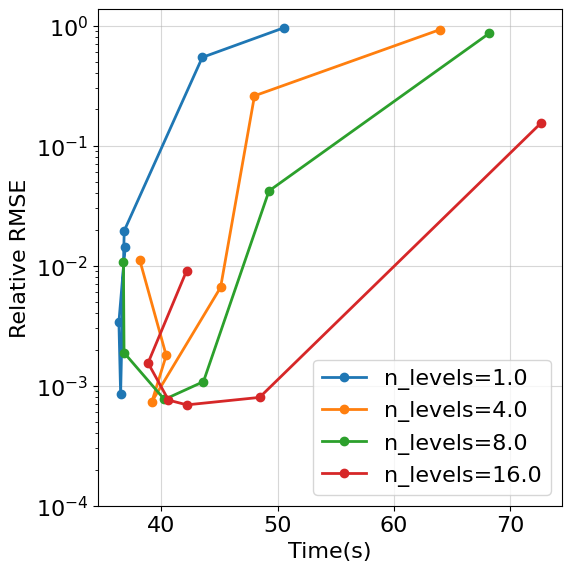

In [44]:
n_level_list = np.sort(all_df["n_levels"].unique())
# batch_size_list = np.sort(all_df["interior_batch"].unique())
# xticks = all_df["base_resolution"].unique()
result_df = all_df[all_df["n_hidden_layers"] == 0.0]
batch_size = 3e4
result_df = result_df[result_df["interior_batch"] == batch_size]
i=0
plt.figure(figsize=(6,6))
for n_level in n_level_list:
    sub_df = result_df[result_df["n_levels"] == n_level]
    sort_idx = np.argsort(sub_df["base_resolution"])
    base_resolution = sub_df["base_resolution"][sort_idx]
    # x_plot = base_resolution*1.12**(n_levels-1)
    x_plot = sub_df["time"][sort_idx]
    y_plot = sub_df["error"][sort_idx]
    # y1_plot = sub_df["error_min"][sort_idx]
    # y2_plot = sub_df["error_max"][sort_idx]
    # y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
    # plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label="batch_size={}".format(batch_size))
    plt.plot(x_plot,y_plot,marker="o",label="n_levels={}".format(n_level))
    plt.legend()
    # plt.xticks(xticks,(xticks*1.12**(4-2)).astype(int))
    plt.yscale("log")
    plt.yticks([1e0,1e-1,1e-2,1e-3,1e-4])
    plt.xlabel("Time(s)")
    plt.ylabel("Relative RMSE")

    plt.grid(alpha = 0.5)
    # plt.title("Simple MLP (0 hidden layer, 16 neurons)")
    # plt.title("n_levels = {}".format(n_levels))
    plt.tight_layout()

In [14]:
all_df = pd.DataFrame()
task_list = [
    "GridMLP_share_resolution_levels_sin_3e3_3e4",
    "GridMLP_share_resolution_levels_sin_network_3e4"
]
param_list = [
    ["network","n_neurons"],
    ["network","n_hidden_layers"],
    ["encoding","base_resolution"],
    ["encoding","n_levels"],
    ["training","interior_batch"]]
for task_name in task_list:
    result_dict = get_result_table(task_name,param_list,main_path=main_path)
    result_df = pd.DataFrame(result_dict).T
    all_df = pd.concat([all_df,result_df])
all_df = all_df[all_df["interior_batch"] == 3e4]

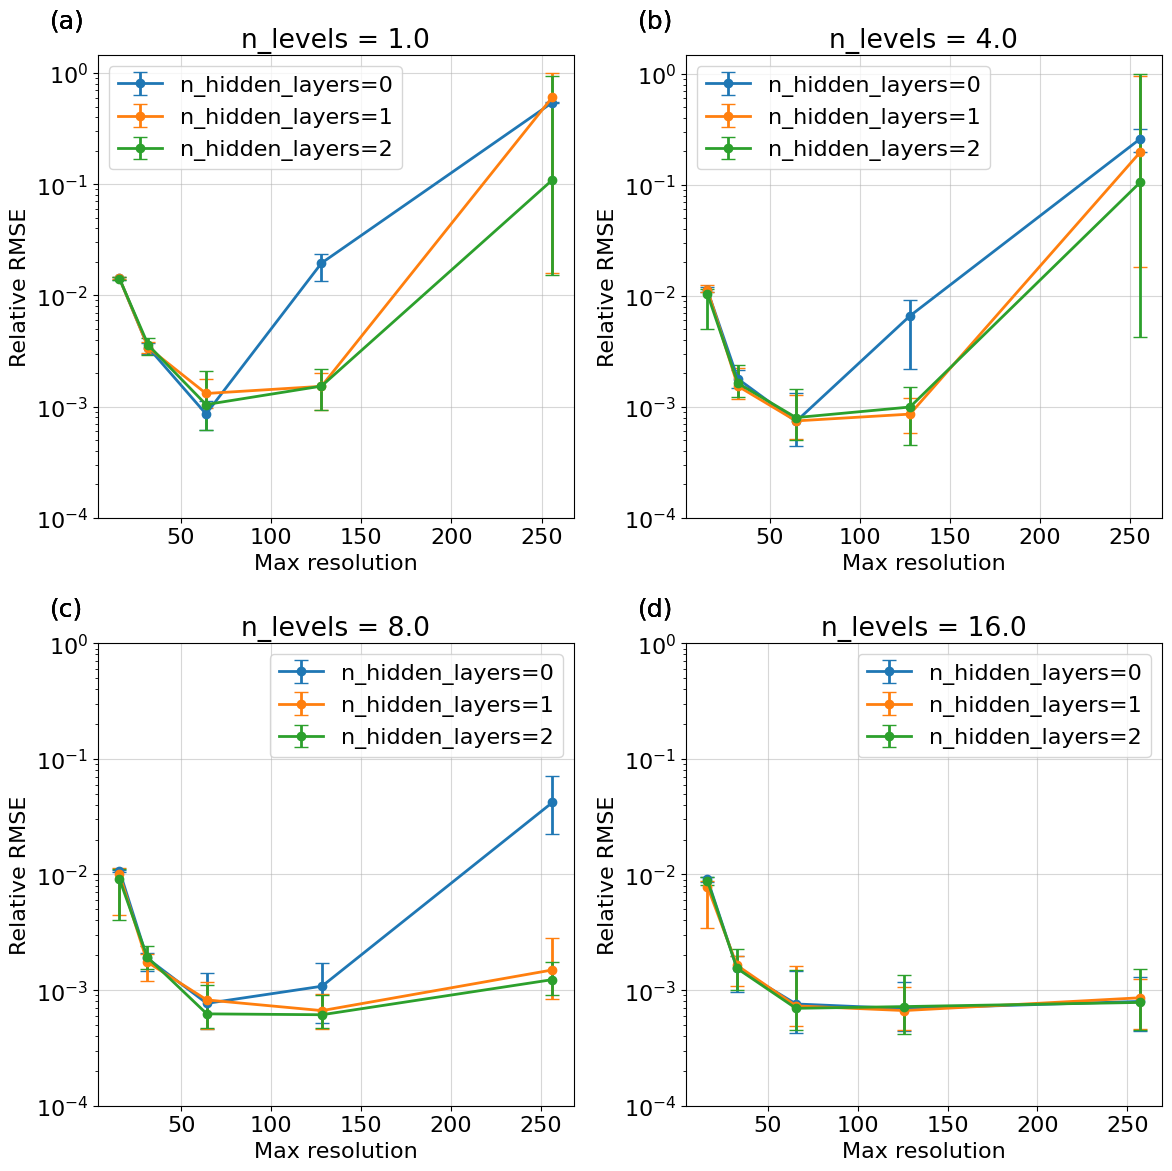

In [37]:
# n_level_list = np.sort(all_df["n_levels"].unique())
label_name = "n_hidden_layers"
filter_value = 16
filter_name = "n_neurons"
label_list = np.sort(all_df[label_name].unique())
result_df = all_df[all_df[filter_name] == filter_value]


i=0
plt.figure(figsize=(12,12))

for n_levels in np.sort(all_df["n_levels"].unique()):
    i = i + 1
    result_df_plots = result_df[result_df["n_levels"] == n_levels]
    plt.subplot(2,2,i)
    for label in label_list:
        sub_df = result_df_plots[result_df_plots[label_name] == label]
        sort_idx = np.argsort(sub_df["base_resolution"])
        base_resolution = sub_df["base_resolution"][sort_idx]
        x_plot = base_resolution*1.12**(n_levels-1)
        y_plot = sub_df["error"][sort_idx][x_plot<500]
        y1_plot = sub_df["error_min"][sort_idx][x_plot<500]
        y2_plot = sub_df["error_max"][sort_idx][x_plot<500]
        
        x_plot = x_plot[x_plot<500]
        y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
        plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label=label_name+"={}".format(int(label)))
        plt.legend()
        # plt.xticks(xticks,(xticks*1.12**(4-2)).astype(int))
        plt.yscale("log")
        plt.yticks([1e0,1e-1,1e-2,1e-3,1e-4])
        plt.ylabel("Relative RMSE")
        plt.xlabel("Max resolution")
        plt.text(-0.1, 1.1, "({})".format(chr(i+96)), transform=plt.gca().transAxes, va='top', fontsize=int(fontsize+2))

        plt.grid(alpha = 0.5)
        # plt.title("Simple MLP (0 hidden layer, 16 neurons)")
        plt.title("n_levels = {}".format(n_levels))
        plt.tight_layout()
plt.tight_layout()
plt.savefig(os.path.join(figure_path,"GridMLP_share_resolution_level_{}_{}={}.png".format(label_name,filter_name,filter_value)), dpi=300)

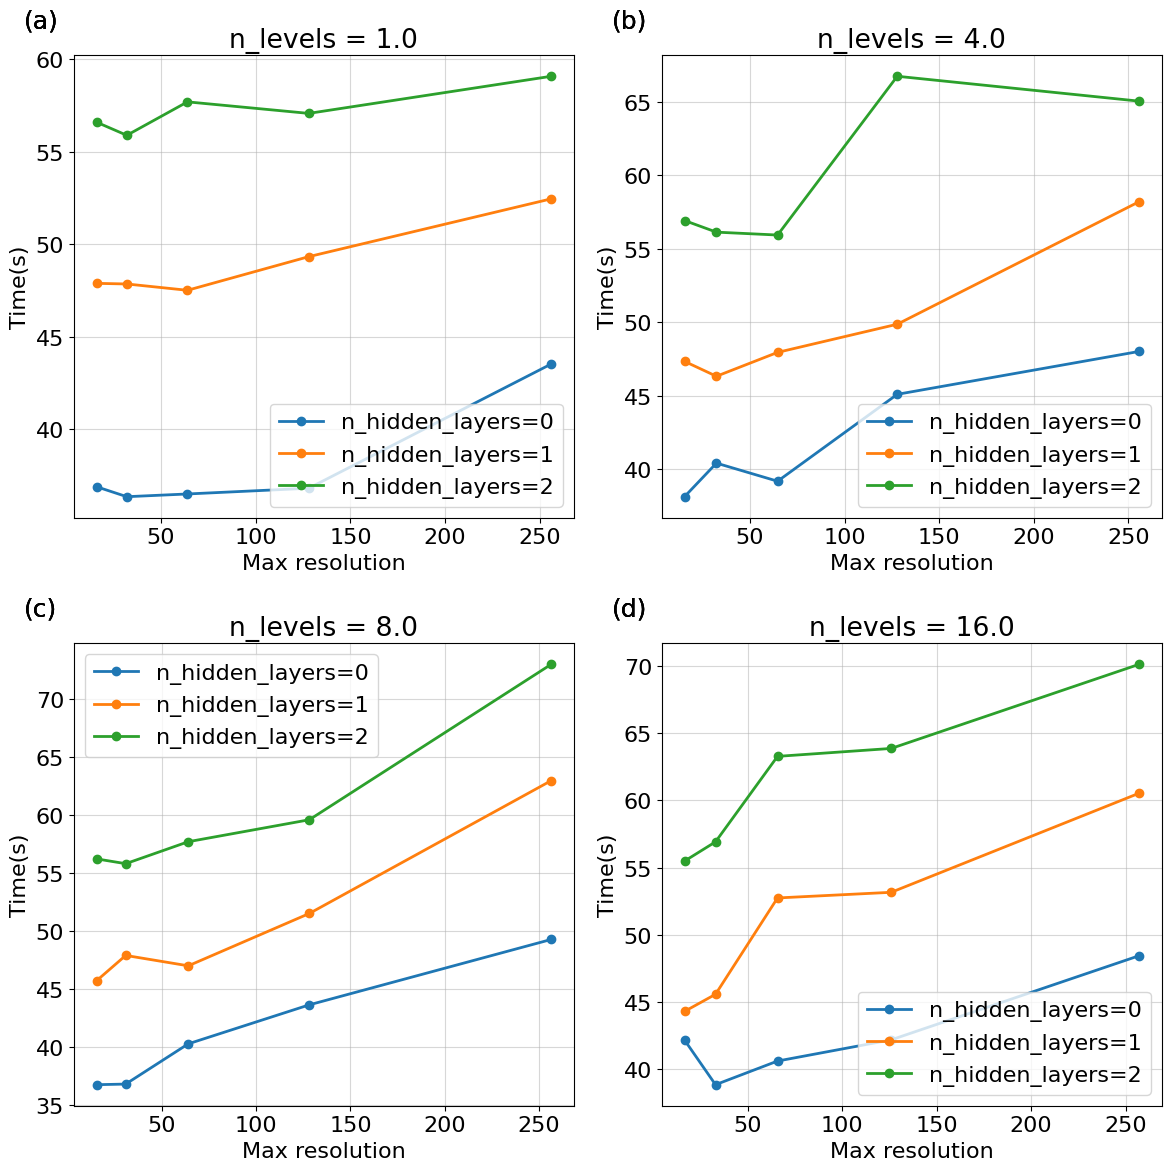

In [40]:
# n_level_list = np.sort(all_df["n_levels"].unique())
label_name = "n_hidden_layers"
filter_value = 16
filter_name = "n_neurons"
label_list = np.sort(all_df[label_name].unique())
result_df = all_df[all_df[filter_name] == filter_value]


i=0
plt.figure(figsize=(12,12))

for n_levels in np.sort(all_df["n_levels"].unique()):
    i = i + 1
    result_df_plots = result_df[result_df["n_levels"] == n_levels]
    plt.subplot(2,2,i)
    for label in label_list:
        sub_df = result_df_plots[result_df_plots[label_name] == label]
        sort_idx = np.argsort(sub_df["base_resolution"])
        base_resolution = sub_df["base_resolution"][sort_idx]
        x_plot = base_resolution*1.12**(n_levels-1)
        y_plot = sub_df["time"][sort_idx][x_plot<500]
        # y1_plot = sub_df["error_min"][sort_idx][x_plot<500]
        # y2_plot = sub_df["error_max"][sort_idx][x_plot<500]
        
        x_plot = x_plot[x_plot<500]
        # y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
        # plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label=label_name+"={}".format(int(label)))
        plt.plot(x_plot,y_plot,marker="o",label=label_name+"={}".format(int(label)))
        plt.legend()
        # plt.xticks(xticks,(xticks*1.12**(4-2)).astype(int))
        # plt.yscale("log")
        # plt.yticks([1e0,1e-1,1e-2,1e-3,1e-4])
        plt.ylabel("Time(s)")
        plt.xlabel("Max resolution")
        plt.text(-0.1, 1.1, "({})".format(chr(i+96)), transform=plt.gca().transAxes, va='top', fontsize=int(fontsize+2))

        plt.grid(alpha = 0.5)
        # plt.title("Simple MLP (0 hidden layer, 16 neurons)")
        plt.title("n_levels = {}".format(n_levels))
        plt.tight_layout()
plt.tight_layout()
# plt.savefig(os.path.join(figure_path,"GridMLP_share_resolution_level_{}_{}={}.png".format(label_name,filter_name,filter_value)), dpi=300)

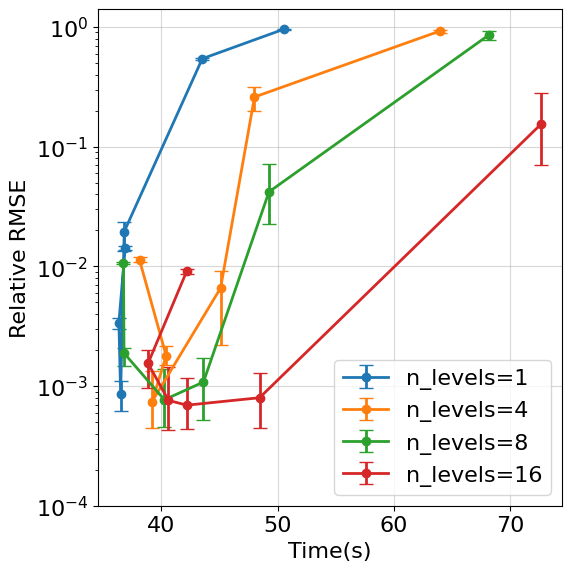

In [43]:
# n_level_list = np.sort(all_df["n_levels"].unique())
label_name = "n_levels"
label_list = np.sort(all_df[label_name].unique())
# xticks = all_df["base_resolution"].unique()
result_df = all_df[all_df["interior_batch"] == 30000]
result_df_plots = result_df[result_df["n_hidden_layers"] == 0.0]

i=0
plt.figure(figsize=(6,6))

for label in label_list:
    sub_df = result_df_plots[result_df_plots[label_name] == label]
    sort_idx = np.argsort(sub_df["base_resolution"])
    base_resolution = sub_df["base_resolution"][sort_idx]
    x_plot = sub_df["time"][sort_idx]
    y_plot = sub_df["error"][sort_idx]
    y1_plot = sub_df["error_min"][sort_idx]
    y2_plot = sub_df["error_max"][sort_idx]
    y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
    plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label=label_name+"={}".format(int(label)))
    plt.legend()
    # plt.xticks(xticks,(xticks*1.12**(4-2)).astype(int))
    plt.yscale("log")
    plt.yticks([1e0,1e-1,1e-2,1e-3,1e-4])
    plt.ylabel("Relative RMSE")
    # plt.xlabel("Max resolution")
    plt.xlabel("Time(s)")
    # plt.xlim([30,100])
    # plt.xscale("log")
    # plt.text(-0.1, 1.1, "({})".format(chr(i+96)), transform=plt.gca().transAxes, va='top', fontsize=int(fontsize+2))

    plt.grid(alpha = 0.5)
    # plt.title("Simple MLP (0 hidden layer, 16 neurons)")
    plt.tight_layout()
plt.tight_layout()
# plt.savefig(os.path.join(figure_path,"GridMLP_share_resolution_levels_batch.png"), dpi=300)

In [8]:
all_df = pd.DataFrame()
task_list = [
    "GridMLP_decoupled_network",
]
param_list = [
    ["network","n_neurons"],
    ["network","n_hidden_layers"],
    ["network","spectral_norm"]]
for task_name in task_list:
    result_dict = get_result_table(task_name,param_list,main_path=main_path)
    result_df = pd.DataFrame(result_dict).T
    all_df = pd.concat([all_df,result_df])
# all_df

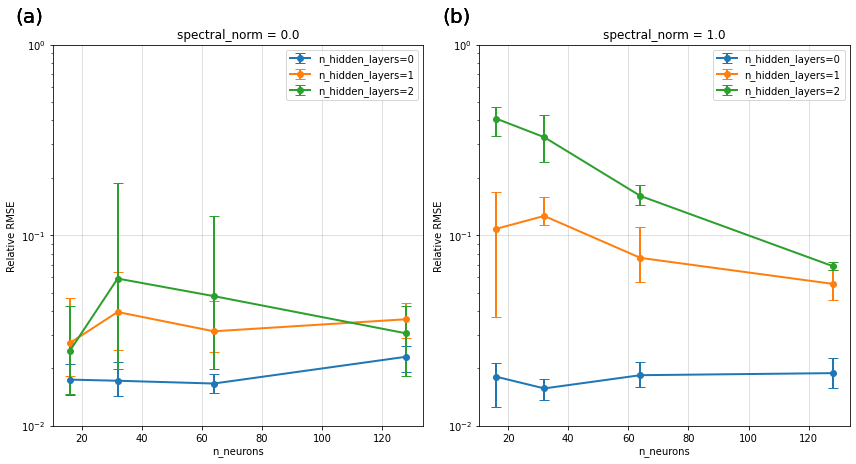

In [10]:
# n_level_list = np.sort(all_df["n_levels"].unique())
label_name = "n_hidden_layers"
plot_name = "spectral_norm"
x_plot_name = "n_neurons"
label_list = np.sort(all_df[label_name].unique())
# xticks = all_df["base_resolution"].unique()
# result_df = all_df[all_df["spectral_norm"] == 1]
# n_levels = 8
n_levels = 16

i=0
plt.figure(figsize=(12,12))

for plot_name_value in np.sort(all_df[plot_name].unique()):
    i = i + 1
    result_df_plots = result_df[result_df[plot_name] == plot_name_value]
    plt.subplot(2,2,i)
    for label in label_list:
        sub_df = result_df_plots[result_df_plots[label_name] == label]
        sort_idx = np.argsort(sub_df[x_plot_name])
        x_plot = sub_df[x_plot_name][sort_idx]
        y_plot = sub_df["error"][sort_idx]
        y1_plot = sub_df["error_min"][sort_idx]
        y2_plot = sub_df["error_max"][sort_idx]
        y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
        plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label=label_name+"={}".format(int(label)))
        plt.legend()
        # plt.xticks(xticks,(xticks*1.12**(4-2)).astype(int))
        plt.yscale("log")
        plt.yticks([1e0,1e-1,1e-2])
        plt.ylabel("Relative RMSE")
        plt.xlabel(x_plot_name)
        plt.text(-0.1, 1.1, "({})".format(chr(i+96)), transform=plt.gca().transAxes, va='top', fontsize=int(fontsize+2))

        plt.grid(alpha = 0.5)
        # plt.title("Simple MLP (0 hidden layer, 16 neurons)")
        plt.title(plot_name + " = {}".format(plot_name_value))
        plt.tight_layout()
plt.tight_layout()
# plt.savefig(os.path.join(figure_path,"GridMLP_share_resolution_levels_batch.png"), dpi=300)

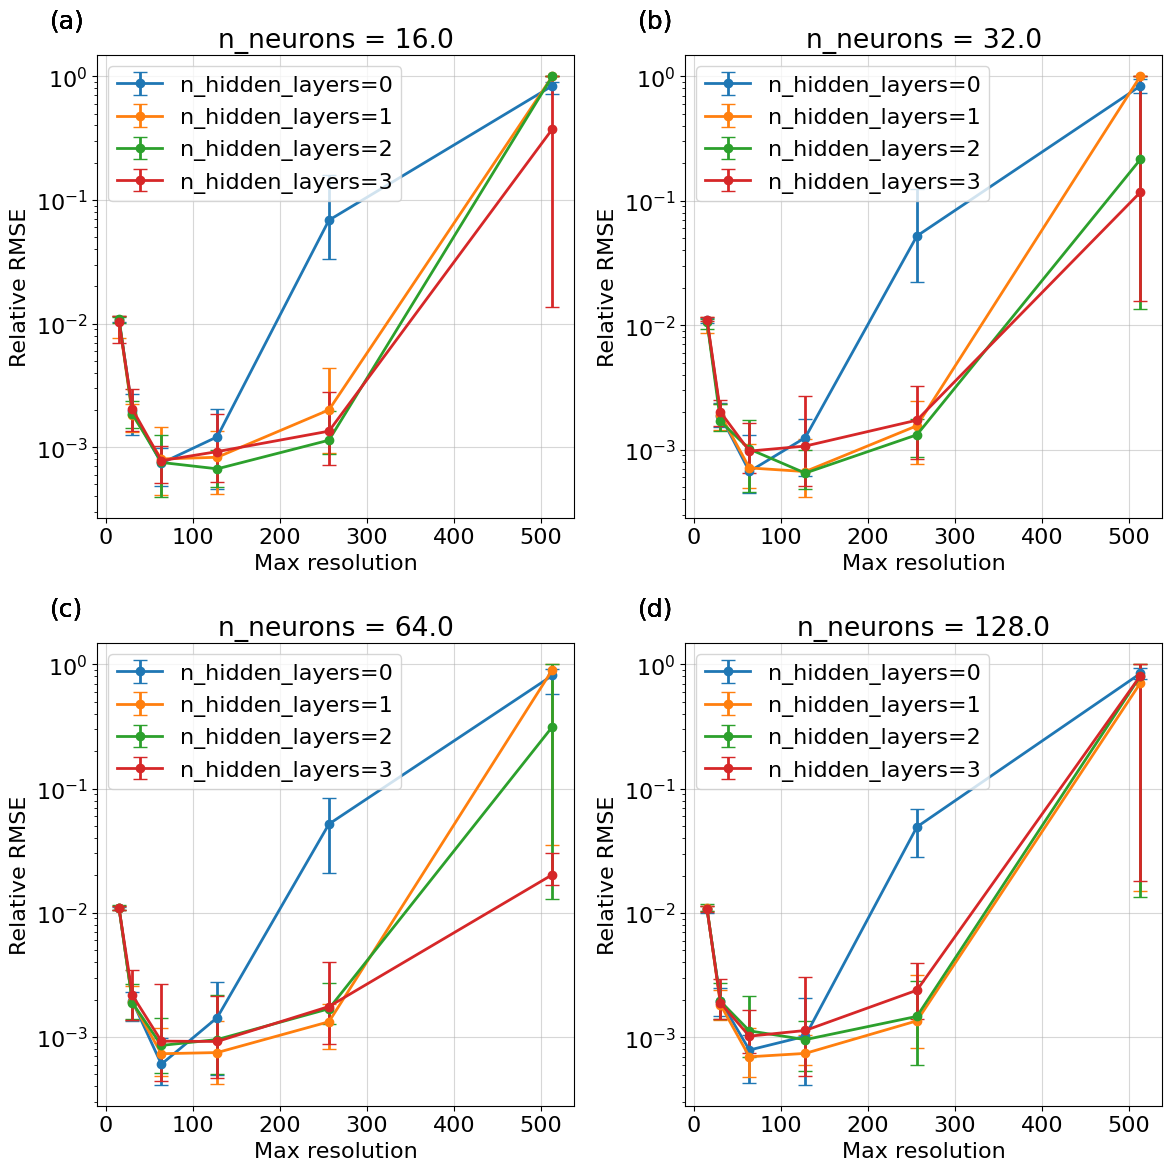

In [12]:
# n_level_list = np.sort(all_df["n_levels"].unique())
label_name = "n_hidden_layers"
plot_name = "n_neurons"
label_list = np.sort(all_df[label_name].unique())
# xticks = all_df["base_resolution"].unique()
result_df = all_df[all_df["spectral_norm"] == 1]
n_levels = 8

i=0
plt.figure(figsize=(12,12))

for plot_name_value in np.sort(all_df[plot_name].unique()):
    i = i + 1
    result_df_plots = result_df[result_df[plot_name] == plot_name_value]
    plt.subplot(2,2,i)
    for label in label_list:
        sub_df = result_df_plots[result_df_plots[label_name] == label]
        sort_idx = np.argsort(sub_df["base_resolution"])
        base_resolution = sub_df["base_resolution"][sort_idx]
        x_plot = base_resolution*1.12**(n_levels-1)
        y_plot = sub_df["error"][sort_idx]
        y1_plot = sub_df["error_min"][sort_idx]
        y2_plot = sub_df["error_max"][sort_idx]
        y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
        plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label=label_name+"={}".format(int(label)))
        plt.legend()
        # plt.xticks(xticks,(xticks*1.12**(4-2)).astype(int))
        plt.yscale("log")
        # plt.yticks([1e0,1e-1,1e-2,1e-3,1e-4])
        plt.ylabel("Relative RMSE")
        plt.xlabel("Max resolution")
        plt.text(-0.1, 1.1, "({})".format(chr(i+96)), transform=plt.gca().transAxes, va='top', fontsize=int(fontsize+2))

        plt.grid(alpha = 0.5)
        # plt.title("Simple MLP (0 hidden layer, 16 neurons)")
        plt.title(plot_name + " = {}".format(plot_name_value))
        plt.tight_layout()
plt.tight_layout()
# plt.savefig(os.path.join(figure_path,"GridMLP_share_resolution_levels_batch.png"), dpi=300)

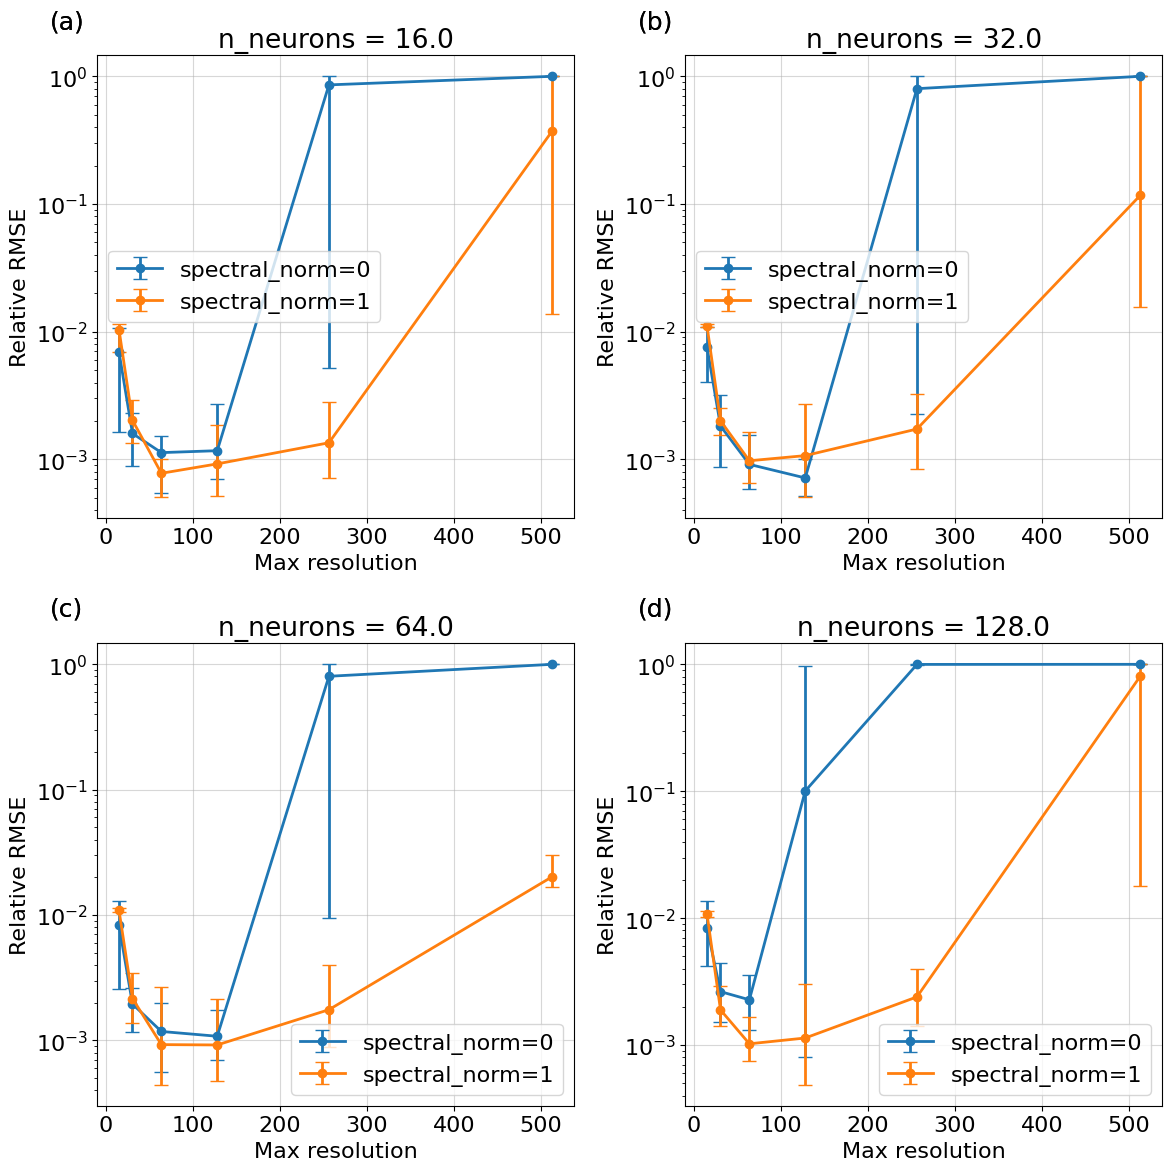

In [10]:
# n_level_list = np.sort(all_df["n_levels"].unique())
label_name = "spectral_norm"
plot_name = "n_neurons"
label_list = np.sort(all_df[label_name].unique())
# xticks = all_df["base_resolution"].unique()
result_df = all_df[all_df["n_hidden_layers"] == 3]
n_levels = 8

i=0
plt.figure(figsize=(12,12))

for plot_name_value in np.sort(all_df[plot_name].unique()):
    i = i + 1
    result_df_plots = result_df[result_df[plot_name] == plot_name_value]
    plt.subplot(2,2,i)
    for label in label_list:
        sub_df = result_df_plots[result_df_plots[label_name] == label]
        sort_idx = np.argsort(sub_df["base_resolution"])
        base_resolution = sub_df["base_resolution"][sort_idx]
        x_plot = base_resolution*1.12**(n_levels-1)
        y_plot = sub_df["error"][sort_idx]
        y1_plot = sub_df["error_min"][sort_idx]
        y2_plot = sub_df["error_max"][sort_idx]
        y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
        plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label=label_name+"={}".format(int(label)))
        plt.legend()
        # plt.xticks(xticks,(xticks*1.12**(4-2)).astype(int))
        plt.yscale("log")
        # plt.yticks([1e0,1e-1,1e-2,1e-3,1e-4])
        plt.ylabel("Relative RMSE")
        plt.xlabel("Max resolution")
        plt.text(-0.1, 1.1, "({})".format(chr(i+96)), transform=plt.gca().transAxes, va='top', fontsize=int(fontsize+2))

        plt.grid(alpha = 0.5)
        # plt.title("Simple MLP (0 hidden layer, 16 neurons)")
        plt.title(plot_name + " = {}".format(plot_name_value))
        plt.tight_layout()
plt.tight_layout()
# plt.savefig(os.path.join(figure_path,"GridMLP_share_resolution_levels_batch.png"), dpi=300)